# Условие

## HW2 - Token Ring
Задача состоит в построении простой модели доисторического сетевого протокола сети под названием TokenRing и исследовании его свойств.
  
Необходимо исследовать пропускную способность сети (throughput) и характерное время задержки (latency) в зависимости от количества узлов N и количества пакетов P (1...N), находящихся в транзите одновременно.
Дополнительно нужно попытаться оптимизировать (улучшить) throughput или latency как в целом так и для отдельно взятых конкретных режимов (недогруженная сеть, перегруженная сеть) и исследовать влияние оптимизаций для одного режима на весь спектр режимов. Описывете историю оптимизации.
 
Рисуете красивые графики, формулируете свои мысли в виде мини-статьи.
Сдаете рабочий код, статью.
 
Оценка будет зависить от

    1) корректности кода

    2) качества анализа результатов

    3) решения доп.задач

    4) оформления (кратко, четко, корректно, научный стиль)


# Отчёт

## Часть 1. Описание кода.

Алгоритм реализован посредством следующих сущностей:
<li>Topology</li>
<li>Node</li>
<li>Frame</li>
<li>Operator</li>

## Часть 2. Постановка исследовательской задачи:

В рамках задачи в качестве throughput удобно рассматривать усреднённое время циркуляции сообщения в сети умноженное на количество токенов. Действительно, эта величина пропорциональна количеству информации, которую можно передать через сеть.

В качестве latency удобно рассматривать время, прошедшее между генерацией сообщения и его достижением адресата. Действительно, эта величина характеризует задержки при передаче информации посредством нашего протокола.

В ходе работы мы собираемся проверить следующие предположения:

    1) На исследуемой области throughput растёт с увеличением количества токенов.

    2) На исследуемой области throughput падает с увеличением количества нод.

    3) На исследуемой области latency падает с увеличением количества токенов.

    4) На исследуемой области latency растёт с увеличением количества нод.
    
Также мы иследуем влияние стратегии работы нод (стандартная / раннее освобождение токена) на throughput и latency.

## Часть 3. Обработка результатов

In [259]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Создадим переменную для хранения имени файла с данными.

In [260]:
name = '10084143top10tok3mess1000rushfalsesiltrues_m10s_n10erfalseEOS'

Считываем файл с данными и дропаем нулевую (служебную) строчку с названием колонок

In [261]:
names = ['Created', 'Sent', 'Received', 'Returned']
data = pd.read_table("D:/Git/TokenRing/research/data/"+name+".txt", sep=' ', names=names)
print(data.head())
data = data.drop(data.index[0])

           Created             Sent         Received         Returned
0          created             sent         received         returned
1  193207822689114  193207828354855  193207828501217  193207828696665
2  193207832461926  193207834204888  193207834214259  193207834495828
3  193207851485912  193207852223971  193207852498847  193207852601479
4  193207861488978  193207862120835  193207863004810  193207863082900


## Data preparation

Приводим данные к числовому виду

In [262]:
data = data.apply(pd.to_numeric, errors='coerce')

Формируем переменные, к которым мы будем обращаться в дальнейшем.

In [263]:
wait_for_sending = data["Sent"] - data["Created"]
wait_for_receiving = data["Received"] - data["Created"]
circulated_before_receiving = data["Received"] - data["Sent"]
time = data["Created"] - min(data["Created"])

In [264]:
wait_for_returning = data["Returned"] - data["Created"]
circulated_before_return = data["Returned"] - data["Sent"]
min(wait_for_returning)

-193209274399122

На момент остановки программы часть сообщений ещё не вернулась.
Сформируем корректные переменные для времени возвращения.

In [265]:
not_returned = data.loc[data["Returned"]==0].index
print "Not returned: " + str(len(not_returned))
circulated_before_return_good = circulated_before_return.drop(not_returned)
wait_for_returning_good = wait_for_returning.drop(not_returned)
time_good = time.drop(not_returned)

Not returned: 1


Для отчёта выводим медианные значения времени.

In [266]:
print "Median wait for sending: "+str(wait_for_sending.median())
print "Median wait for receiving: "+str(wait_for_receiving.median())
print "Median wait for returning: "+str(wait_for_returning_good.median())
print "Median circulation time: "+str(circulated_before_return_good.median())
print "Min circulation time: "+str(circulated_before_return.min())
print "Max circulation time: "+str(circulated_before_return.max())

Median wait for sending: 2083878.5
Median wait for receiving: 2448000.0
Median wait for returning: 2885302.0
Median circulation time: 734936.0
Min circulation time: -193209276223743
Max circulation time: 5211037


define function for plotting

In [267]:
def plotHist(label, dataset):
    f = plt.figure(figsize=(10, 8))
    plt.hist(dataset, bins=50)
    plt.title(label)
    plt.xlabel("time (nanos)")
    plt.ylabel("Frequency")
    plt.plot()

In [268]:
def plotScatter(label, dataset, timeset=time):
    f = plt.figure(figsize=(10, 8))
    plt.title(label)
    plt.ylabel("time (nanos)")
    plt.xlabel("program execution time (nanos)")
    plt.scatter(timeset, dataset)
    plt.plot()

# Sending

## Plot of wait for sending

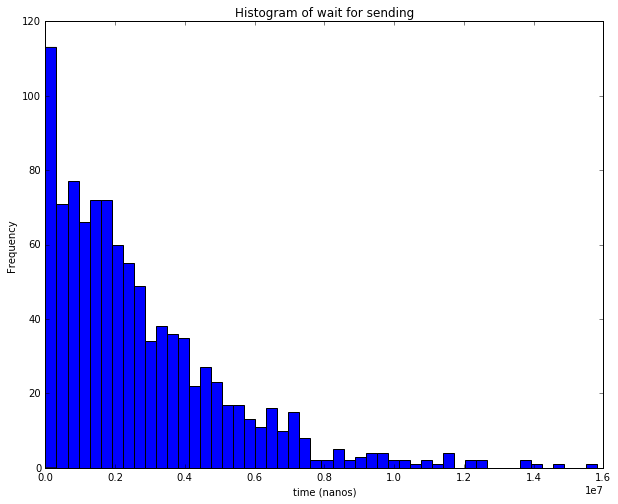

In [269]:
plotHist("Histogram of wait for sending", wait_for_sending)

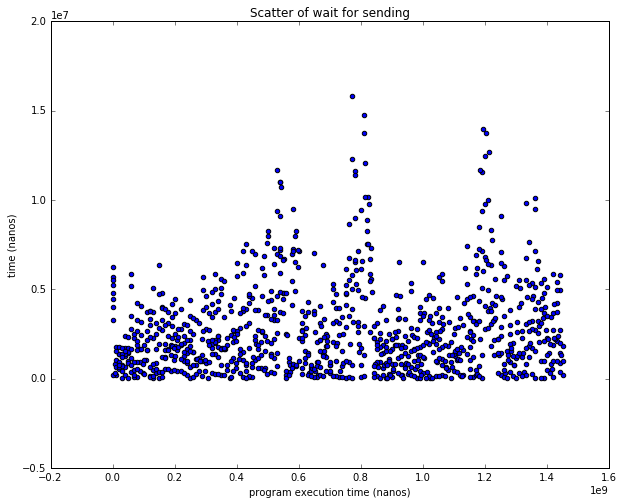

In [270]:
plotScatter("Scatter of wait for sending", wait_for_sending)

# Receiving

## Plot of wait for receiving

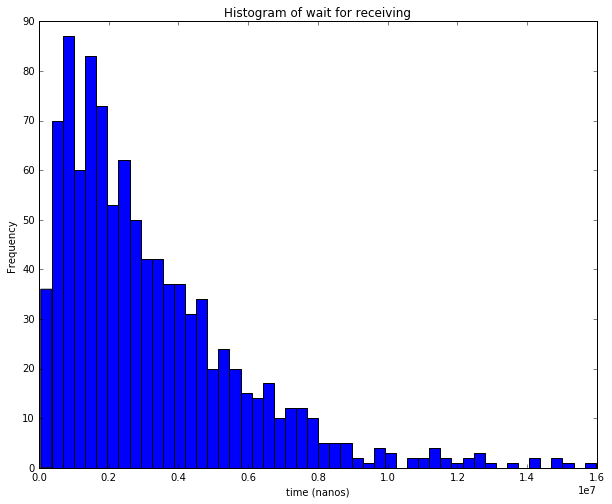

In [271]:
plotHist("Histogram of wait for receiving", wait_for_receiving)

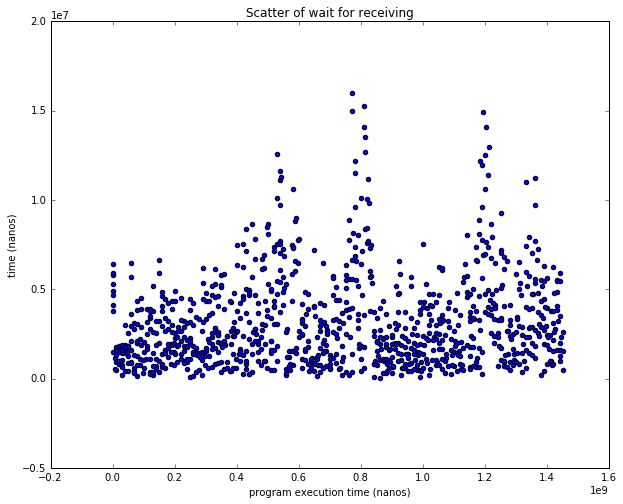

In [272]:
plotScatter("Scatter of wait for receiving", wait_for_receiving)

## Circulate before received

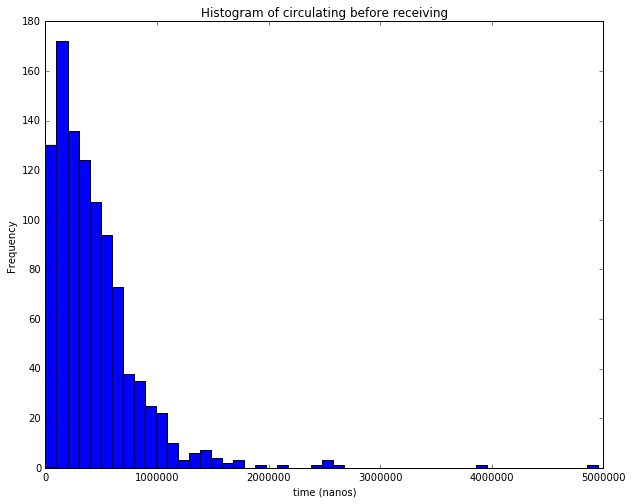

In [273]:
plotHist("Histogram of circulating before receiving", circulated_before_receiving)

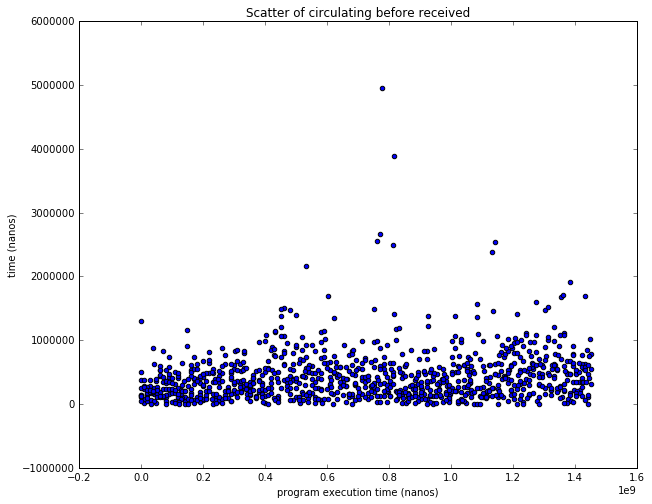

In [274]:
plotScatter("Scatter of circulating before received", circulated_before_receiving)

# Returning

## Plot of wait for returning

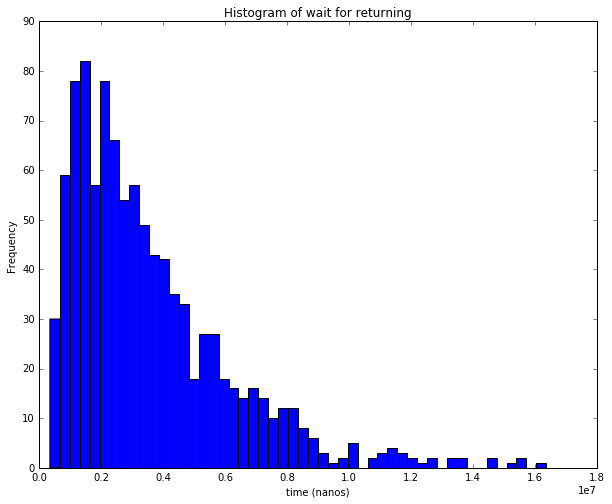

In [275]:
plotHist("Histogram of wait for returning", wait_for_returning_good)

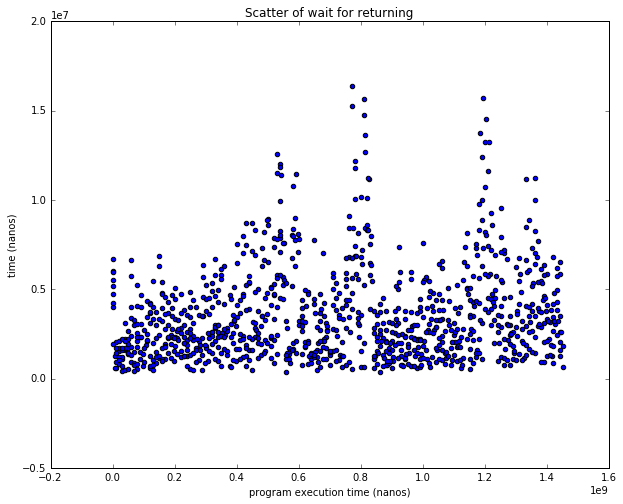

In [276]:
plotScatter("Scatter of wait for returning", wait_for_returning_good, time_good)

## Circulate before returned

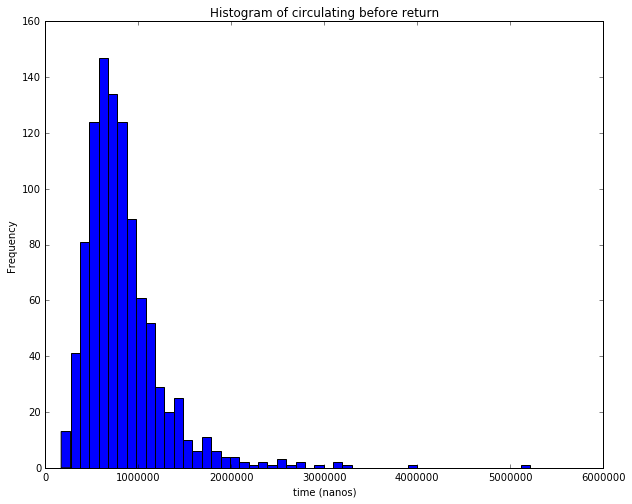

In [277]:
plotHist("Histogram of circulating before return", circulated_before_return_good)

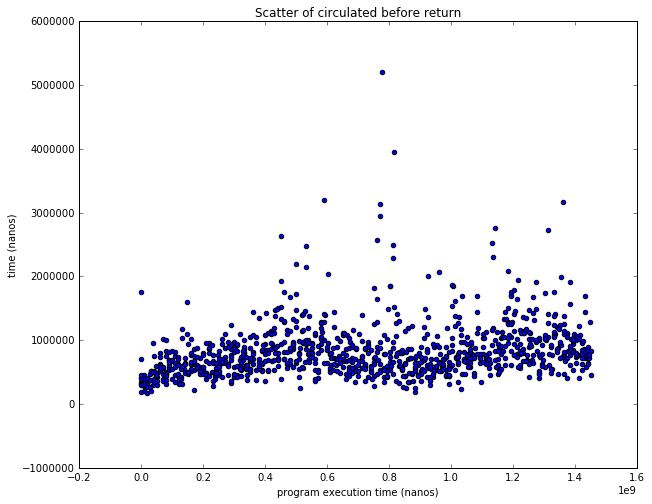

In [278]:
plotScatter("Scatter of circulated before return", circulated_before_return_good, time_good)